In [3]:
import pandas as mypd
import matplotlib.pyplot as myplot
import seaborn as mysb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


data = mypd.read_csv("data/Project_Admission_Predict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
#To check missing values
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [7]:
#Separating x1,x2,x3,x4,x5,x6,x7's and y's
x = data.iloc[:, 1:8]
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [8]:
data.rename(columns={'Chance of Admit ':'Chance_of_Admit'},inplace=True)
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

In [9]:
y = data.Chance_of_Admit
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance_of_Admit, Length: 400, dtype: float64

In [10]:
#Correlation Analysis
# Scatter plot
df = data.drop("Serial No.", axis=1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


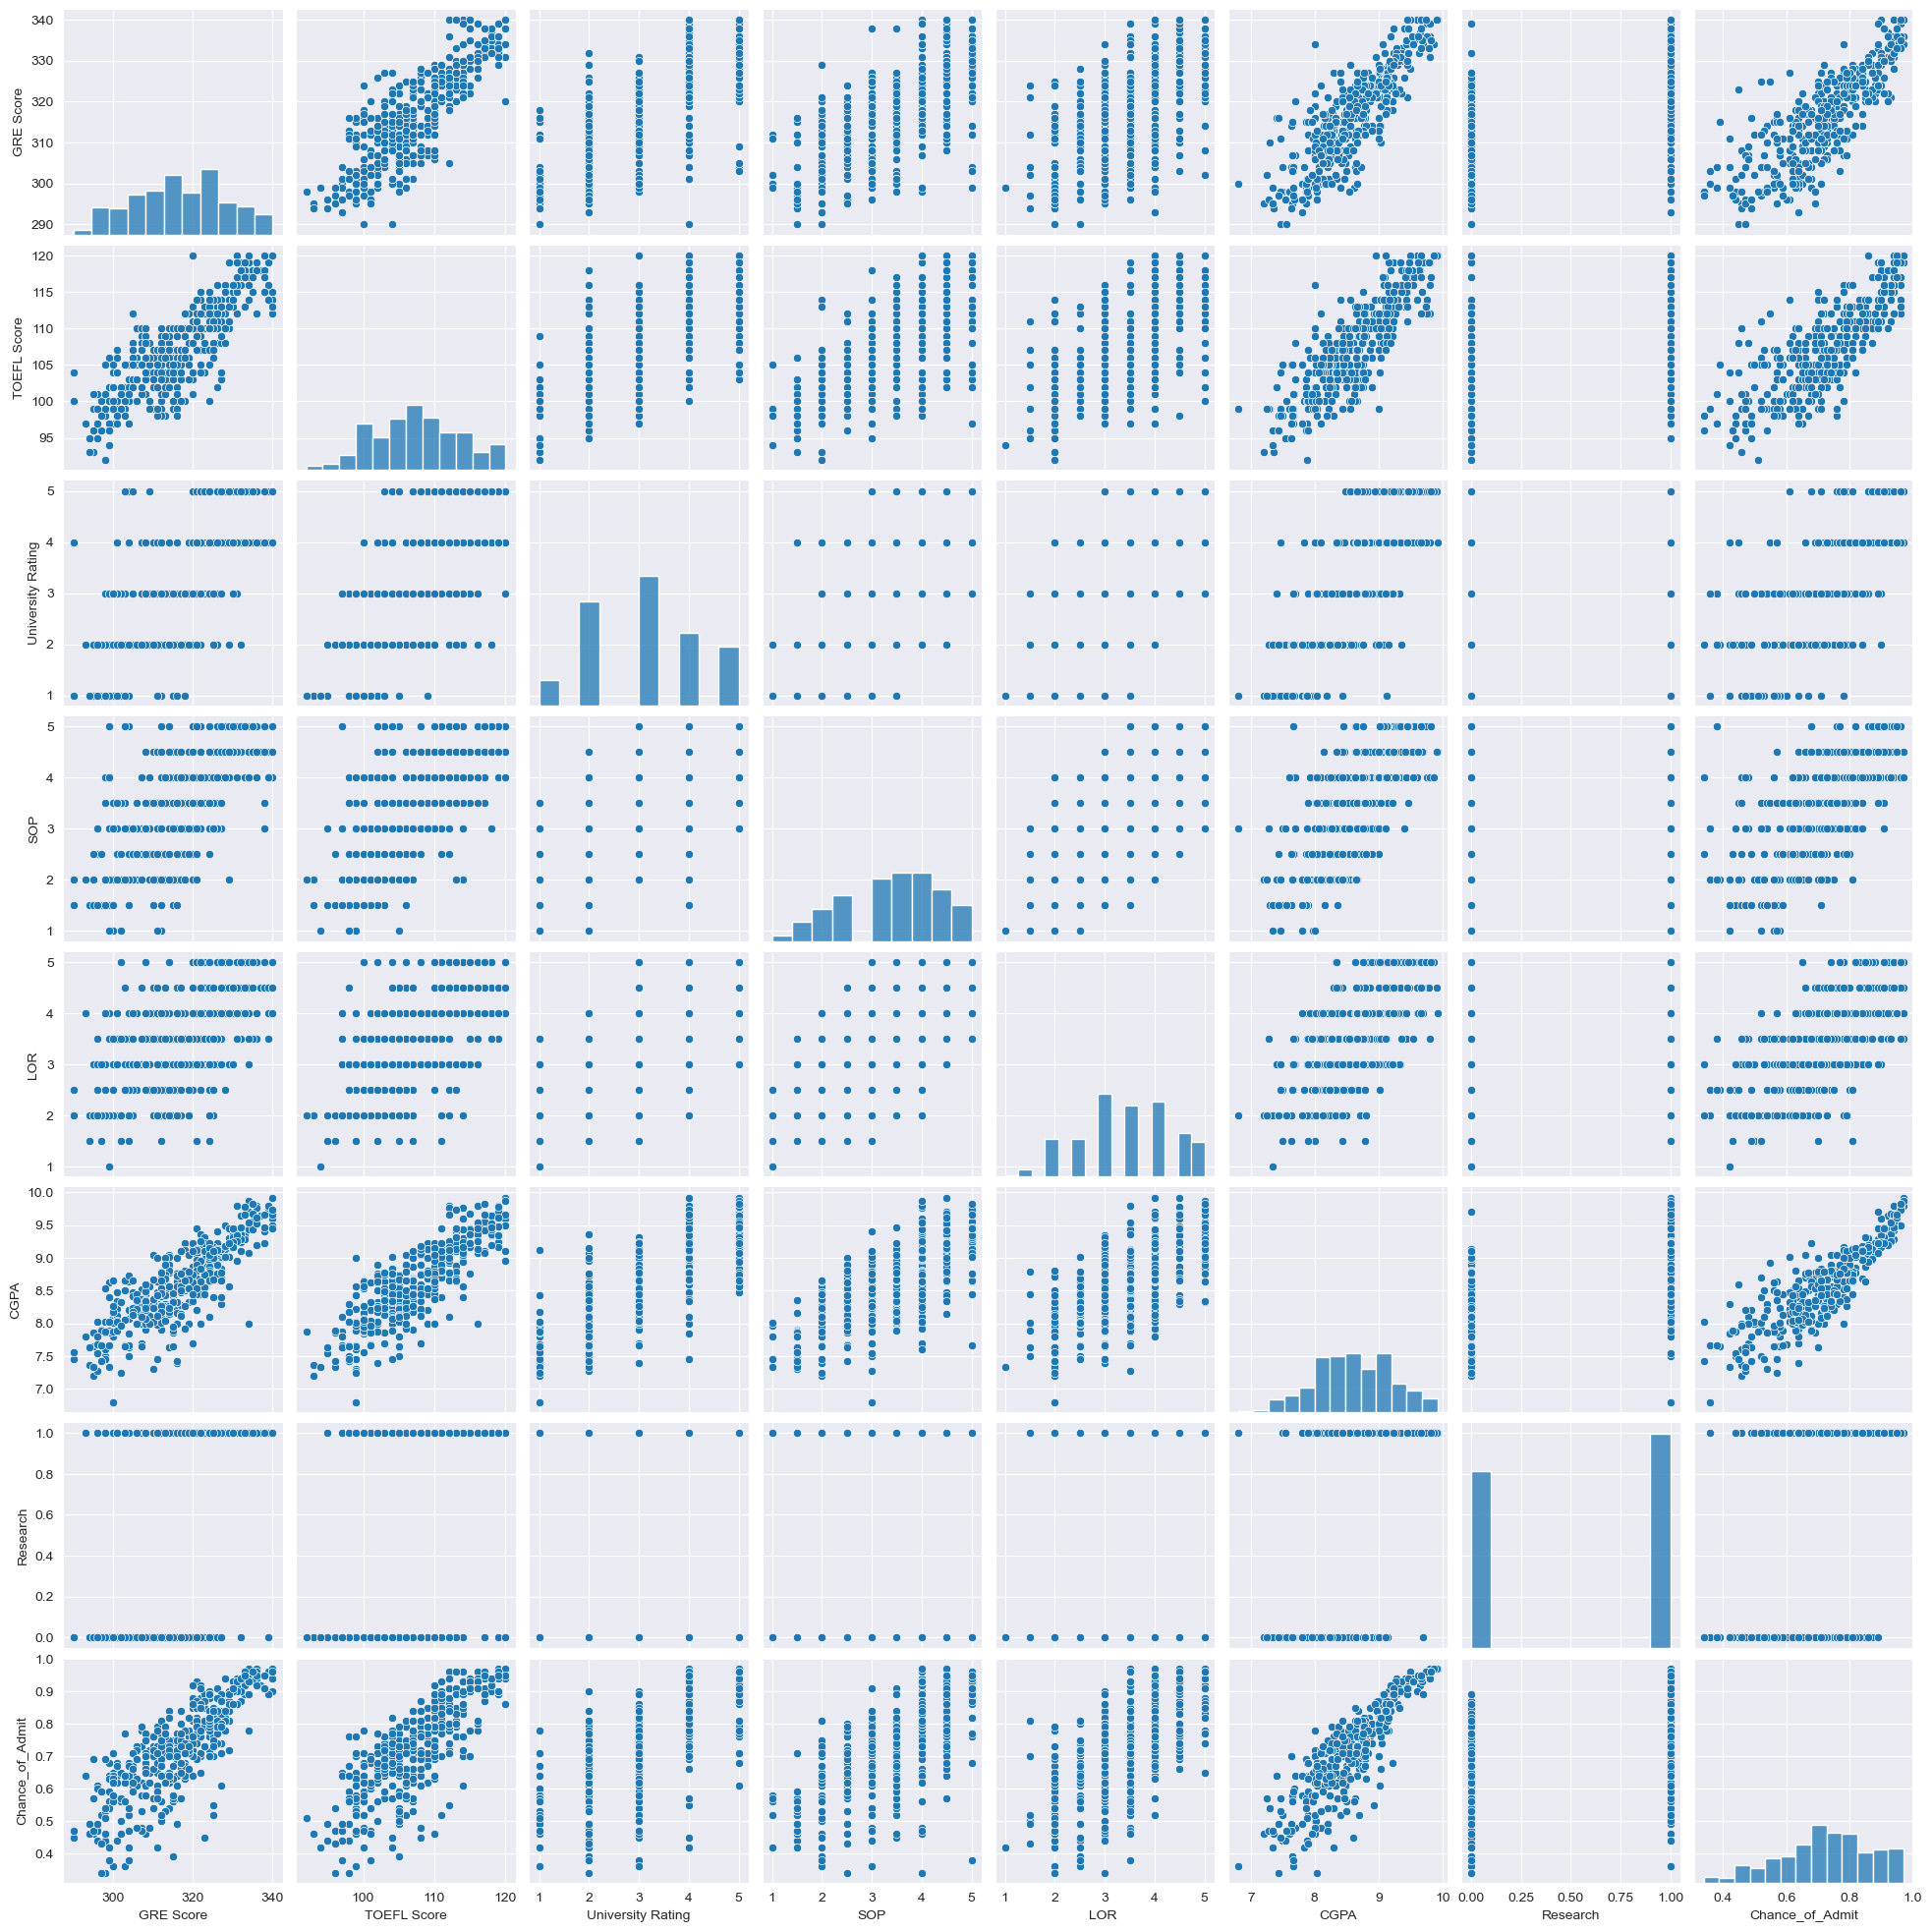

In [12]:
mysb.pairplot(df)
myplot.show()

In [13]:
#Regression Modeling
# fitting the model
mymodel = LinearRegression()
mymodel

LinearRegression()

In [14]:
mymodel = mymodel.fit(x,y)
mymodel

LinearRegression()

In [15]:
mymodel.coef_

array([ 0.00173741,  0.00291958,  0.00571666, -0.00330517,  0.02235313,
        0.11893945,  0.02452511])

In [16]:
mymodel.intercept_

-1.2594324782480195

In [17]:
# Model accuracy-R Square value
#A good R² might be 0.7 or above
#If you're getting 0.8+, that’s very good
#If it's below 0.5, it means the model is missing important patterns or features

rsq = mymodel.score(x,y)
rsq

0.8034713719824393

In [18]:
round(rsq*100,2)

80.35

In [19]:
pred = mymodel.predict(x)
pred

array([0.95145856, 0.80563668, 0.65473672, 0.73836237, 0.63520644,
       0.86585369, 0.71298611, 0.60111955, 0.54721429, 0.71258632,
       0.73331233, 0.83798935, 0.85454028, 0.63921616, 0.63465527,
       0.64133249, 0.70948364, 0.65130637, 0.73187372, 0.64842668,
       0.61112216, 0.69480683, 0.92738243, 0.95917695, 0.95549776,
       0.96227964, 0.75686109, 0.52336409, 0.42480122, 0.48764304,
       0.60150182, 0.7144819 , 0.92841887, 0.9352382 , 0.95990336,
       0.86028384, 0.65624528, 0.54319204, 0.49667295, 0.58154955,
       0.64552574, 0.65502698, 0.68015917, 0.83873356, 0.88255438,
       0.82951159, 0.90279796, 0.93381492, 0.81391688, 0.75875428,
       0.69169457, 0.62345591, 0.71227997, 0.68394493, 0.65815354,
       0.58738328, 0.54513739, 0.49421302, 0.42464989, 0.62126521,
       0.60137214, 0.61512233, 0.64370202, 0.70102937, 0.74954297,
       0.7826933 , 0.78866058, 0.73224745, 0.82743953, 0.85760623,
       0.95682275, 0.96052767, 0.89467569, 0.7985727 , 0.77315

In [20]:
mse = mean_squared_error(y, pred)
mse

0.003986893243246914

In [21]:
import math as mymath
rmse = mymath.sqrt(mse)
rmse

0.06314185017282051

In [22]:
# Residual Analysis
res = y-pred
res

0     -0.031459
1     -0.045637
2      0.065263
3      0.061638
4      0.014794
         ...   
395    0.011802
396    0.028845
397    0.001983
398   -0.052639
399    0.020050
Name: Chance_of_Admit, Length: 400, dtype: float64

In [23]:
pred=mypd.DataFrame(pred,columns=['Predicted'])
pred

,Predicted
0,0.951459
1,0.805637
2,0.654737
3,0.738362
4,0.635206
...,...
395,0.808198
396,0.811155
397,0.908017
398,0.722639


In [24]:
myresult=data.join(pred)
myresult

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Predicted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.951459
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.805637
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.654737
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.738362
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.635206
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,0.808198
396,397,325,107,3,3.0,3.5,9.11,1,0.84,0.811155
397,398,330,116,4,5.0,4.5,9.45,1,0.91,0.908017
398,399,312,103,3,3.5,4.0,8.78,0,0.67,0.722639


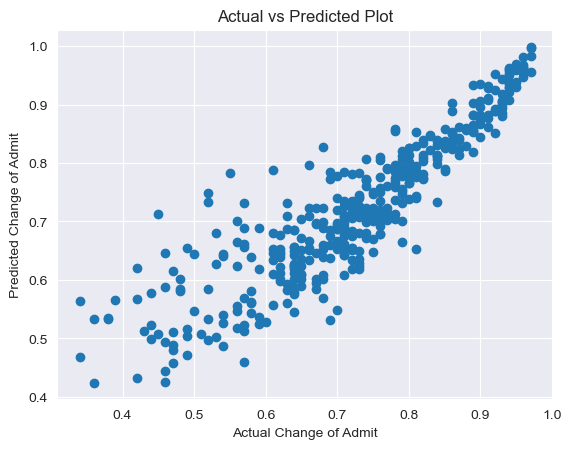

In [25]:
from scipy import stats
#Residual Analysis – Actual Vs Predicted Plot
myplot.scatter(y, pred)
myplot.title("Actual vs Predicted Plot")
myplot.xlabel("Actual Change of Admit")
myplot.ylabel("Predicted Change of Admit")
myplot.show()

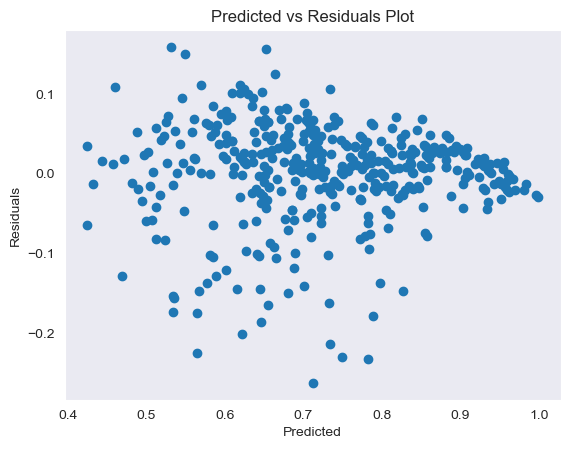

In [26]:
#Residual Analysis – Predicted Vs Residuals Plot
myplot.scatter(pred, res)
myplot.title("Predicted vs Residuals Plot")
myplot.xlabel("Predicted")
myplot.ylabel("Residuals")
myplot.grid()
myplot.show()

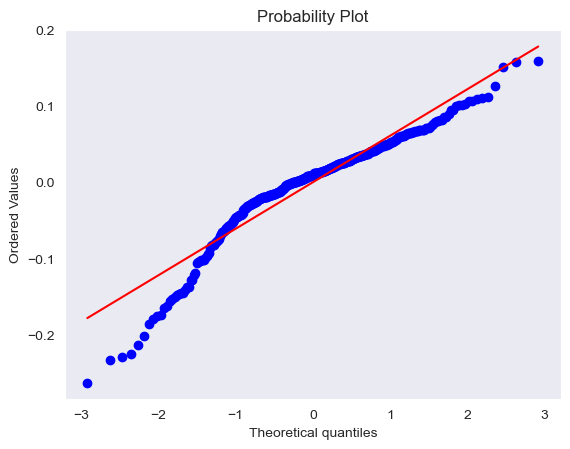

In [27]:
#Residual Analysis: Normality test
norm_test = stats.normaltest(res)
w = norm_test[0]
p_value = norm_test[1]
stats.probplot(res, plot= myplot)
myplot.grid()
myplot.show()

In [28]:
stats.normaltest(res)
#gives p value>0.05. So residuals are normally distributed

NormaltestResult(statistic=87.89531415765404, pvalue=8.199267172374321e-20)

In [29]:
# Cross Validation-Model Generalizability check(compare mse and rmse for original one and those obtained after cross validation)
myscore = cross_val_score(mymodel,x, y, scoring='neg_mean_squared_error', cv = 4)
myscore


array([-0.01007303, -0.0032087 , -0.00174471, -0.00359546])

In [30]:
cv_mse=-1*myscore.mean()
cv_mse

0.004655474880556296

In [31]:
rmse = mymath.sqrt(cv_mse)
rmse

0.068231040447558

In [32]:
#Cross validation residual sum of squares
cv_rss=cv_mse*16
cv_rss

0.07448759808890074

In [33]:
#Total Sum of Squares
total_ss=y.var()*(16-1)
total_ss

0.3050613157894736

In [34]:
cv_rsq=1-(cv_rss/total_ss)
cv_rsq

0.7558274542410173

In [39]:
newX = [[330,118,4,4.5,4.5,9.65,1]]
pred = mymodel.predict(newX)
pred

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.93929668])

In [45]:
x = data.iloc[:, 1:8]

In [49]:
x = data.iloc[:, 1:8].to_numpy()